In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import classification_report

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
from scipy.stats import skew

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [8]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [9]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
df.shape

(5000, 14)

In [11]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [15]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

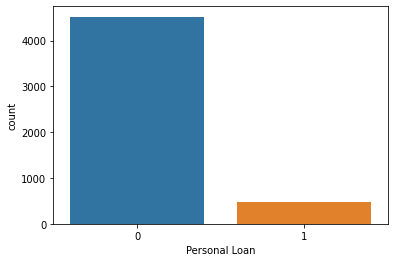

In [16]:
plt.figure()
sns.countplot(data=df,x="Personal Loan")
plt.show()

In [17]:
df.drop(['ID','ZIP Code'],inplace=True,axis=1)

In [18]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [19]:
df.shape

(5000, 12)

In [20]:
sd=df[df["Experience"]<0]

In [21]:
sd.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [22]:
sd.shape

(52, 12)

In [23]:
sd['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [24]:
df['Experience']=df['Experience'].replace(-1,0)
df['Experience']=df['Experience'].replace(-2,0)
df['Experience']=df['Experience'].replace(-3,0)

In [25]:
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [26]:
df_num=df[["Age","Experience","Income","CCAvg","Mortgage"]]

In [27]:
df_num.head()

,Age,Experience,Income,CCAvg,Mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0
3,35,9,100,2.7,0
4,35,8,45,1.0,0


In [28]:
df_cat=df[["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]]

In [29]:
df_cat.head()

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,0,1


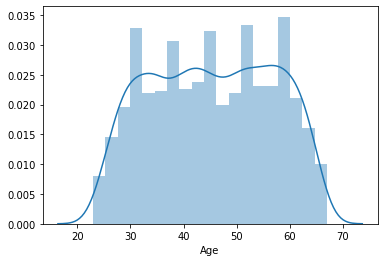

Age : -0.029331878574766698
-----------------------------------------------


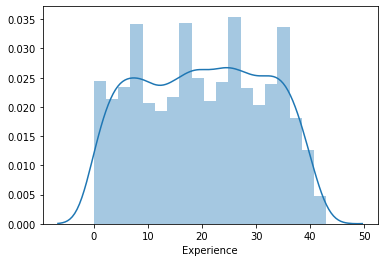

Experience : -0.017215538722506932
-----------------------------------------------


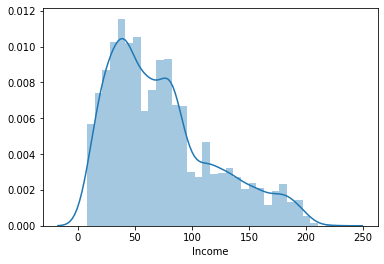

Income : 0.8410861846424931
-----------------------------------------------


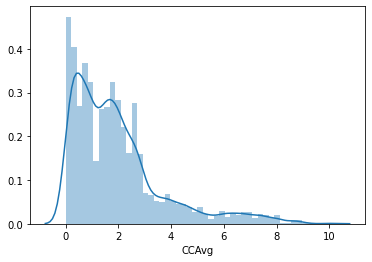

CCAvg : 1.5979637637001873
-----------------------------------------------


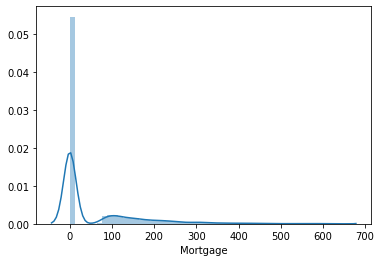

Mortgage : 2.103371065804789
-----------------------------------------------


In [30]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(col,':',skew(df_num[col]))
    print("-----------------------------------------------")

In [31]:
for col in df_num:
    if skew(df_num[col]) >= 0.1 or skew(df_num[col]) <= -0.1 :
        if col!='Personal Loan':
            print(col)

Income
CCAvg
Mortgage


In [32]:
for col in df_num:
    if skew(df_num[col]) >= 0.1 and skew(df_num[col]) <= -0.1 :
        if col!='Personal Loan':
            print(col)

In [33]:
df_num['Income']=np.sqrt(df_num['Income'])
df_num['CCAvg']=np.sqrt(df_num['CCAvg'])
df_num['Mortgage']=np.sqrt(df_num['Mortgage'])

In [34]:
for col in df_num:
    print(col,':',skew(df_num[col]))

Age : -0.029331878574766698
Experience : -0.017215538722506932
Income : 0.26035759523724794
CCAvg : 0.4238991859957578
Mortgage : 1.1505655543742128


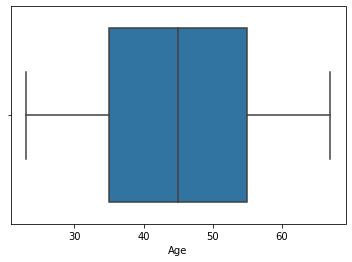

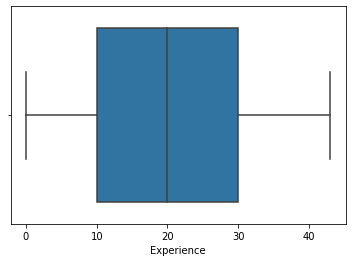

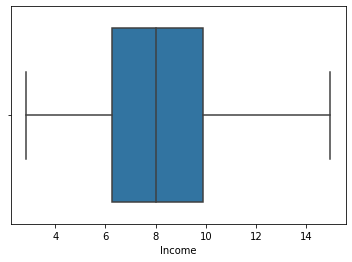

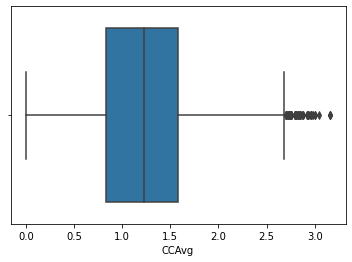

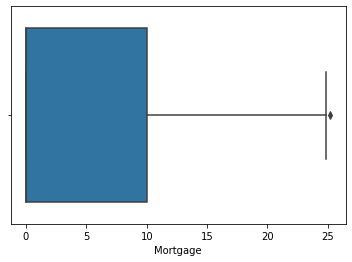

In [35]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

In [36]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [37]:
df_new.head()

,Age,Experience,Income,CCAvg,Mortgage,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,7.000000,1.264911,0.0,4,1,0,1,0,0,0
1,45,19,5.830952,1.224745,0.0,3,1,0,1,0,0,0
2,39,15,3.316625,1.000000,0.0,1,1,0,0,0,0,0
3,35,9,10.000000,1.643168,0.0,1,2,0,0,0,0,0
4,35,8,6.708204,1.000000,0.0,4,2,0,0,0,0,1


In [38]:
s=df_new['CCAvg']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [39]:
len(outliers1)

108

In [40]:
#print(outliers1)

In [41]:
a=list(outliers1.keys())
df.drop(a,inplace=True)

In [42]:
s=df_new['Mortgage']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [43]:
print(outliers2)

{2934: 25.199206336708304}


In [44]:
b=list(outliers2.keys())
df.drop(b,inplace=True)

In [45]:
X=df_new.drop("Personal Loan",axis=1)
Y=df_new['Personal Loan']

In [46]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,7.000000,1.264911,0.0,4,1,1,0,0,0
1,45,19,5.830952,1.224745,0.0,3,1,1,0,0,0
2,39,15,3.316625,1.000000,0.0,1,1,0,0,0,0
3,35,9,10.000000,1.643168,0.0,1,2,0,0,0,0
4,35,8,6.708204,1.000000,0.0,4,2,0,0,0,1


In [47]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [49]:
ss=StandardScaler()

In [50]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [51]:
rus=RandomUnderSampler()

In [52]:
X_rus,Y_rus=rus.fit_sample(X_train_ss,Y_train)

In [53]:
Y_rus.value_counts()

1    331
0    331
Name: Personal Loan, dtype: int64

In [54]:
def create_model(model):
    model.fit(X_rus,Y_rus)
    Y_pred=model.predict(X_test_ss)
    print(classification_report(Y_test,Y_pred))

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1351
           1       0.46      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.93      0.89      0.90      1500



In [57]:
from sklearn.tree import DecisionTreeClassifier 

In [58]:
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(max_depth=8)
dt3=DecisionTreeClassifier(min_samples_leaf=50)
dt4=DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")

In [59]:
create_model(dt1)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1351
           1       0.72      0.91      0.81       149

    accuracy                           0.96      1500
   macro avg       0.86      0.94      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [60]:
create_model(dt2)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1351
           1       0.70      0.92      0.79       149

    accuracy                           0.95      1500
   macro avg       0.84      0.94      0.88      1500
weighted avg       0.96      0.95      0.96      1500



In [61]:
create_model(dt3)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1351
           1       0.69      0.91      0.79       149

    accuracy                           0.95      1500
   macro avg       0.84      0.93      0.88      1500
weighted avg       0.96      0.95      0.95      1500



In [62]:
create_model(dt4)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1351
           1       0.69      0.91      0.79       149

    accuracy                           0.95      1500
   macro avg       0.84      0.93      0.88      1500
weighted avg       0.96      0.95      0.95      1500



In [63]:
from sklearn.svm import LinearSVC

In [64]:
svm1=LinearSVC(random_state=1)

In [65]:
create_model(svm1)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1351
           1       0.46      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.93      0.89      0.90      1500



In [66]:
from sklearn.svm import SVC

In [67]:
svm2=SVC(random_state=1,kernel="poly")
svm3=SVC(random_state=1,kernel="rbf")

In [68]:
create_model(svm2)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1351
           1       0.71      0.80      0.75       149

    accuracy                           0.95      1500
   macro avg       0.84      0.88      0.86      1500
weighted avg       0.95      0.95      0.95      1500



In [69]:
create_model(svm3)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1351
           1       0.59      0.91      0.72       149

    accuracy                           0.93      1500
   macro avg       0.79      0.92      0.84      1500
weighted avg       0.95      0.93      0.94      1500



In [70]:
from sklearn.naive_bayes import BernoulliNB
be=BernoulliNB()

In [71]:
create_model(be)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1351
           1       0.29      0.83      0.43       149

    accuracy                           0.78      1500
   macro avg       0.63      0.80      0.65      1500
weighted avg       0.91      0.78      0.82      1500



In [72]:
import math
math.sqrt(len(Y_test))

38.72983346207417

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=38)

In [75]:
create_model(knn)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1351
           1       0.40      0.87      0.54       149

    accuracy                           0.86      1500
   macro avg       0.69      0.86      0.73      1500
weighted avg       0.92      0.86      0.88      1500



In [76]:
from sklearn.ensemble import BaggingClassifier
bc1=BaggingClassifier(LogisticRegression(),random_state=1)
bc2=BaggingClassifier(LogisticRegression(),random_state=1,bootstrap=False)

In [77]:
create_model(bc1)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1351
           1       0.46      0.87      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.88      0.77      1500
weighted avg       0.93      0.89      0.90      1500



In [78]:
create_model(bc2)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1351
           1       0.46      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.93      0.89      0.90      1500



In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)

In [80]:
create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1351
           1       0.73      0.96      0.83       149

    accuracy                           0.96      1500
   macro avg       0.86      0.96      0.90      1500
weighted avg       0.97      0.96      0.96      1500



In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
ada=AdaBoostClassifier(n_estimators=100)
gbc=GradientBoostingClassifier(n_estimators=100)

In [83]:
create_model(ada)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1351
           1       0.56      0.93      0.70       149

    accuracy                           0.92      1500
   macro avg       0.78      0.92      0.83      1500
weighted avg       0.95      0.92      0.93      1500



In [84]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1351
           1       0.75      0.95      0.84       149

    accuracy                           0.96      1500
   macro avg       0.87      0.96      0.91      1500
weighted avg       0.97      0.96      0.97      1500



In [85]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)

In [86]:
create_model(xgb)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1351
           1       0.76      0.95      0.84       149

    accuracy                           0.96      1500
   macro avg       0.87      0.96      0.91      1500
weighted avg       0.97      0.96      0.97      1500

